In [23]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import backend as K

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import glob
import pylab as pl
from PIL import Image
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
def compareinout(outim, testimg, initialshape=(28,28)):
  """
  This function generates a comparison between the original test image
  and the processed one.
  """
  for i in range(10):
    fig = pl.figure(figsize(6,3))
  
    ax = fig.add_subplot(121) 
    ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    ax = fig.add_subplot(122) 
    ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [25]:
def compareinout_encoded(outim, testimg, initialshape=(28,28)):
  """
  This function not only generates a comparison between the original test
  image and the processed one, but it also produces a chart that shows which
  number that the test image is most similar to
  """
  for i in range(10):
    fig = pl.figure(figsize(6,3))
    figMid = pl.figure(figsize(10,5))

    ax = fig.add_subplot(131) 
    ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = figMid.add_subplot(132)
    pl.imshow(functors(testimg[i:i+1])[0])
    pl.yticks([])

    ax = fig.add_subplot(133) 
    ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [26]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train, _), (test, _) = mnist.load_data()

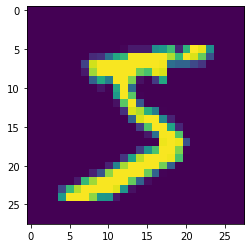

In [27]:
pl.imshow(train[0])

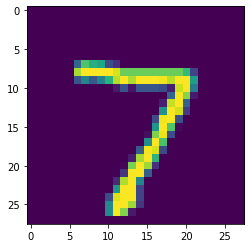

In [28]:
pl.imshow(test[0])

In [29]:

# Normalize and reshape the data
train = (train.astype(float) / 255).reshape(len(train), 784)
test = (test.astype(float) / 255).reshape(len(test), 784)
train.shape, test.shape


((60000, 784), (10000, 784))

In [30]:
model = Sequential()
## encoder
# input layer and the output size
model.add(Dense(128, activation='relu', input_dim=784))
#compression layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
## deencoder
#decompression layers, same size as in the encoder
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
#output layer, same size as input
model.add(Dense(784, activation='sigmoid'))



In [31]:
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt)

In [32]:
history = model.fit(
    train,
    train,
    epochs=20,
    batch_size=100,
    validation_data=(test, test),
    callbacks=[callback]
)

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.2226 - val_loss: 0.1580
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1481 - val_loss: 0.1377
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1333 - val_loss: 0.1277
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1259 - val_loss: 0.1226
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1220 - val_loss: 0.1194
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1191 - val_loss: 0.1165
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1164 - val_loss: 0.1144
Epoch 8/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1145 - val_loss: 0.1127
Epoch 9/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1129 - val_loss: 0.1111
Epoch 10/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1115 - val_loss: 0.1096

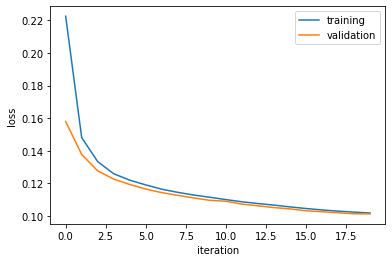

In [33]:
pl.plot(np.array(history.history['loss']), label="training")
pl.plot(np.array(history.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()

This shows that the lines effectively converged during this training, and there was not much more learning to occur, since the slope became almost flat

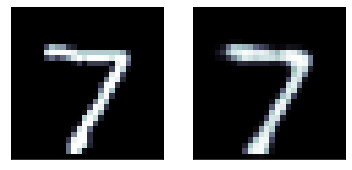

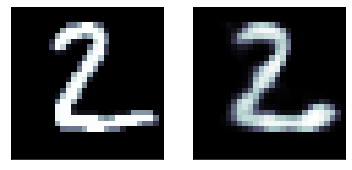

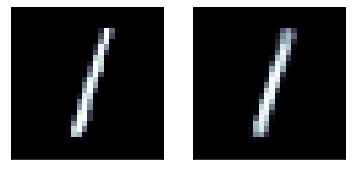

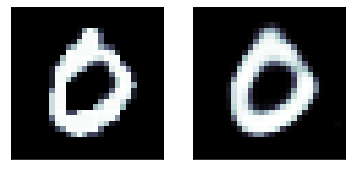

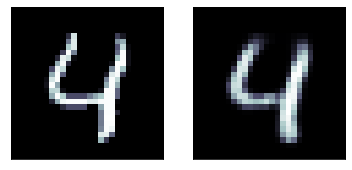

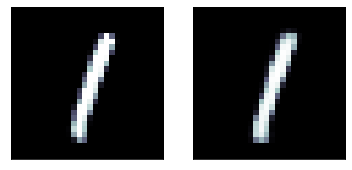

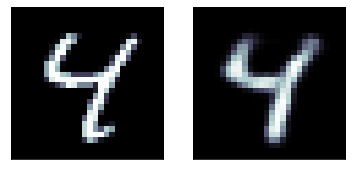

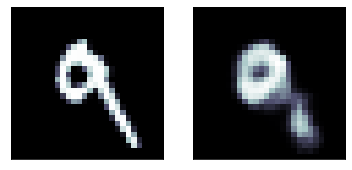

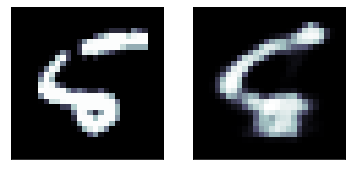

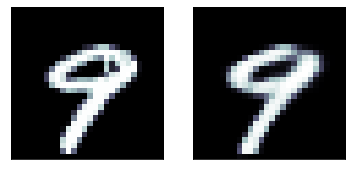

In [34]:
output_image = model.predict(test)
compareinout(output_image, test)

It seems that the image was able to be recovered after being compressed down to 16 neurons!

In [35]:
model2=model
opt2 = keras.optimizers.Adadelta(learning_rate=0.03)
model2.compile(optimizer=opt2, loss="mean_squared_error")

In [36]:
history2 = model2.fit(
    train,
    train,
    epochs=30,
    batch_size=100,
    validation_data=(test, test)
)

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 2/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 3/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 6/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 7/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 8/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 9/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 10/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0125 - val_loss: 0.0125

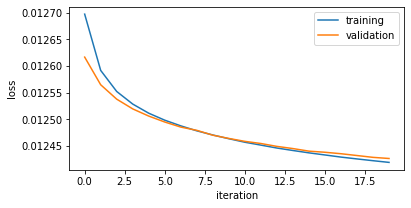

In [37]:
pl.plot(np.array(history2.history['loss']), label="training")
pl.plot(np.array(history2.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()

While I couldv'e let there be more epochs, so that more learning would happen, the rate of change is a very small percentage of the general loss.

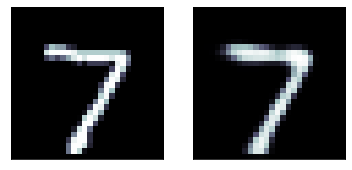

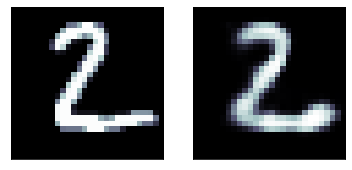

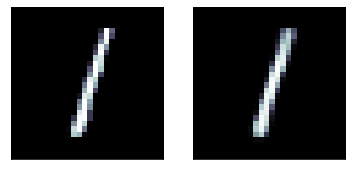

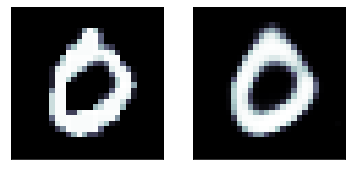

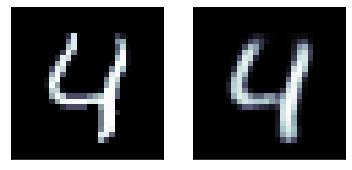

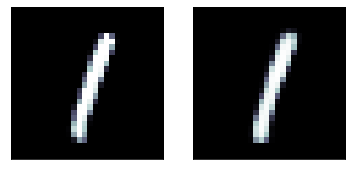

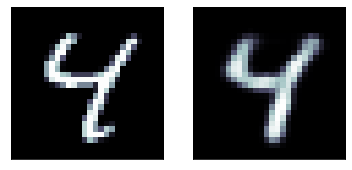

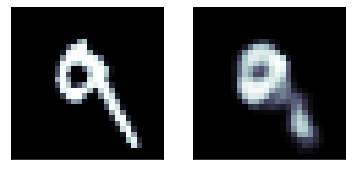

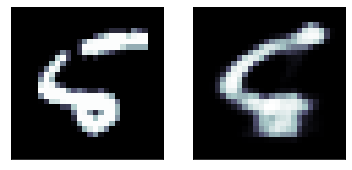

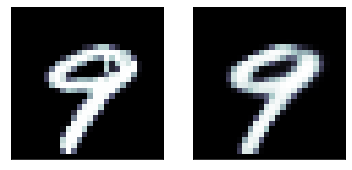

In [38]:
output_image2 = model2.predict(test)
compareinout(output_image2, test)

While most of the images are legible, some of them aren't.

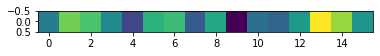

In [39]:

# input placeholder
inp = model2.input                   
# extract the bottle neck outputs
outputs = model2.layers[3].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    

# Testing
layer_outs = functors(test[:1])
pl.imshow(functors(test[:1])[0]);

It failed to 'see' the 7


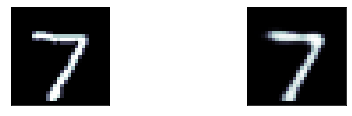

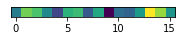

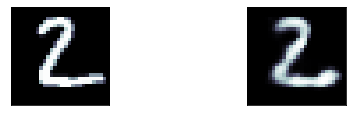

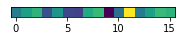

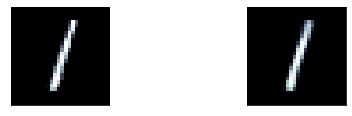

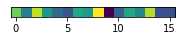

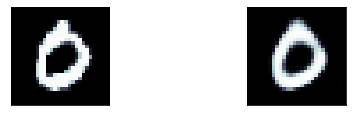

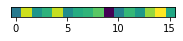

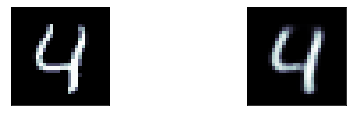

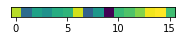

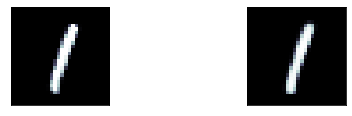

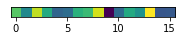

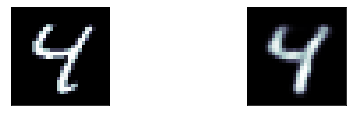

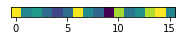

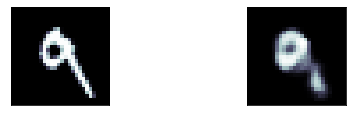

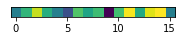

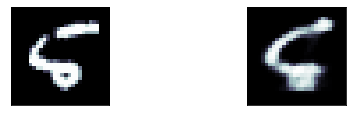

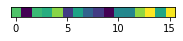

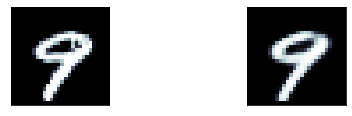

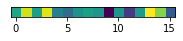

In [40]:
compareinout_encoded(output_image2, test)

# Enter The desired Photo Number Below: (between 1 and 10)

It's ability to recognize numbers is very poor

In [68]:
photo_number = 2

In [67]:
for i in range(10):
  if max(functors(test[photo_number-1:photo_number])[0][0][:10])==functors(test[photo_number-1:photo_number])[0][0][i]:
    print("Photo ",photo_number," is recognized as:\t",i)

Photo  2  is recognized as:	 8


---

<h1 style="color:red"> Great ! to build a model that able to regognize a digits, needed to trained with labels(-2pt)</h1>
